In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def generate_pixel_circle(radius):
    grid_size = radius * 2 + 1
    z = np.zeros((grid_size, grid_size))
    n = len(z)
    m = len(z[0])

    center_x = n // 2
    center_y = m // 2

    I, J = np.meshgrid(np.arange(z.shape[0]), np.arange(z.shape[1]))

    # calculate distance of all points to centre
    dist = np.sqrt((I - center_x) ** 2 + (J - center_y) ** 2)

    # Assign value of 1 to those points where dist<radius:
    z[np.where(dist < radius)] = 1

    return z

In [180]:
def plot_pixel_circle(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.pcolormesh(matrix)
    ax.set_aspect("equal")
    plt.tight_layout()

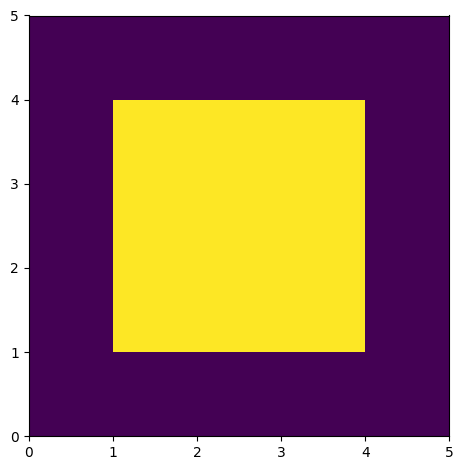

In [181]:
plot_pixel_circle(generate_pixel_circle(2))

In [182]:
def expand_pixel(matrix, x, y, expansion_radius):
    kernel = generate_pixel_circle(expansion_radius)

    center_x, center_y = x, y
    start_x = center_x - kernel.shape[0] // 2
    start_y = center_y - kernel.shape[1] // 2

    new_matrix = np.zeros_like(matrix, dtype=bool)

    # Use logical AND operation to combine the two matrices
    new_matrix[
        start_x : start_x + kernel.shape[0], start_y : start_y + kernel.shape[1]
    ] = np.logical_or(
        matrix[
            start_x : start_x + kernel.shape[0], start_y : start_y + kernel.shape[1]
        ],
        kernel,
    )

    return new_matrix

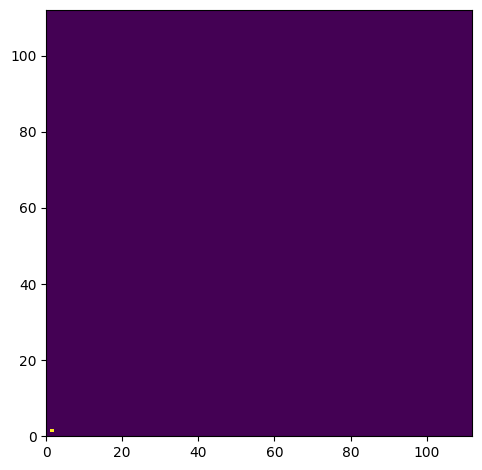

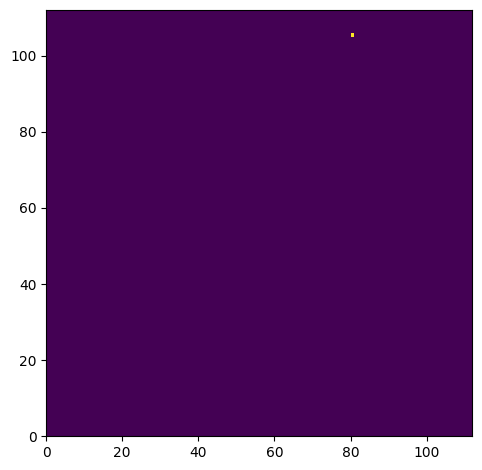

In [188]:
c1 = np.zeros((112, 112))
xpx1, ypx1 = 1, 1
c1[xpx1][ypx1] = 1
plot_pixel_circle(c1)

c2 = np.zeros((112, 112))
xpx2, ypx2 = 105, 80
c2[xpx2][ypx2] = 1
plot_pixel_circle(c2)

In [189]:
channels = [c1, c2]
channels_points = [(xpx1, ypx1), (xpx2, ypx2)]

In [185]:
new_channels = []

for chan, points in zip(channels, channels_points):
    new_channels.append(expand_pixel(chan, points[0], points[1], 5))

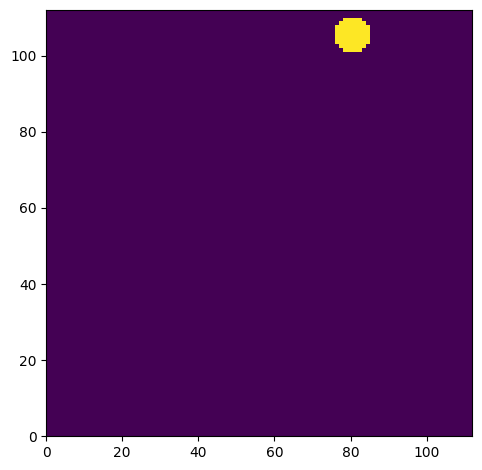

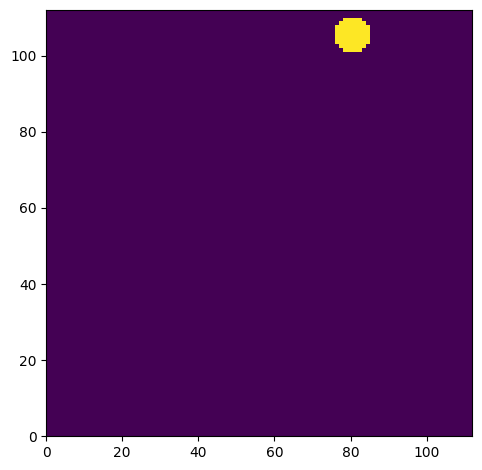

In [186]:
for chan in new_channels:
    plot_pixel_circle(chan)